Name: Feifan Gu /
Github Username: Feifan126 /
USC ID: 8135699631

In [230]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(a) Download the Vertebral Column Data Set

In [231]:
data, meta = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data)
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'  


(b) Pre-Processing and Exploratory data analysis

i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_17864/2126151366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({b'Abnormal': 1, b'Normal': 0})


<Axes: xlabel='degree_spondylolisthesis', ylabel='class'>

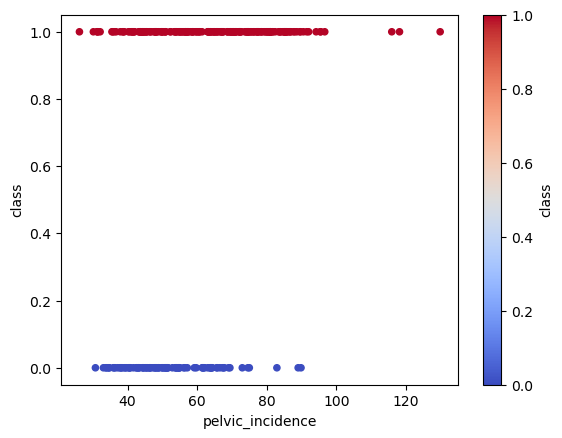

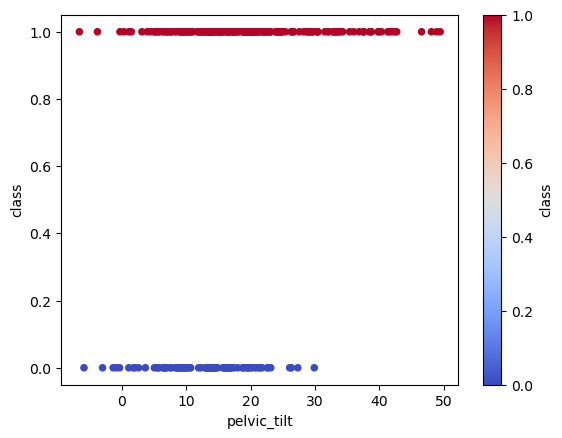

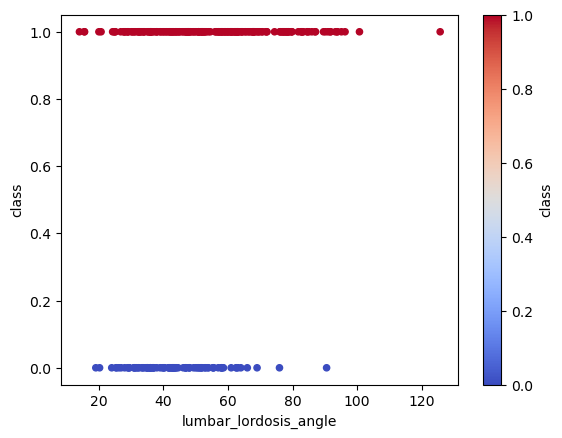

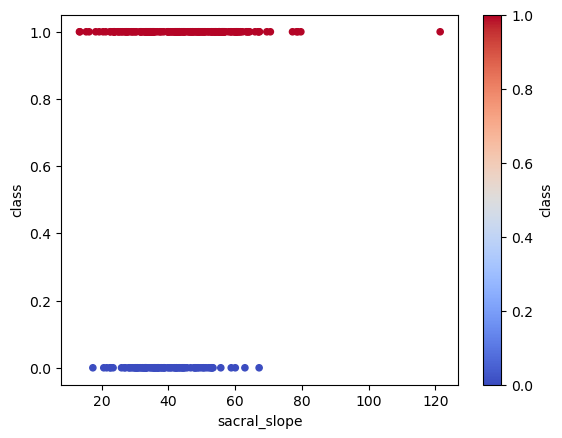

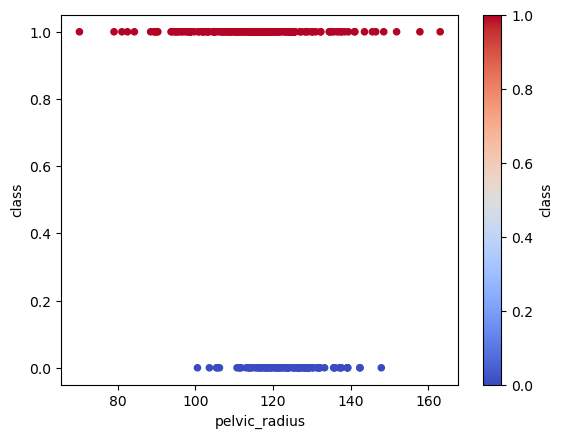

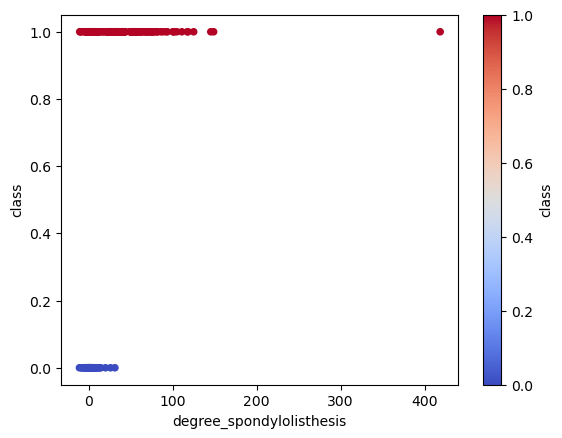

In [232]:
pelvic_incidence = df["pelvic_incidence"]
df['class'] = df['class'].replace({b'Abnormal': 1, b'Normal': 0})
df.plot(x='pelvic_incidence', y='class', kind='scatter', c='class', cmap='coolwarm')
df.plot(x='pelvic_tilt', y='class', kind='scatter', c='class', cmap='coolwarm')
df.plot(x='lumbar_lordosis_angle', y='class', kind='scatter', c='class', cmap='coolwarm')
df.plot(x='sacral_slope', y='class', kind='scatter', c='class', cmap='coolwarm')
df.plot(x='pelvic_radius', y='class', kind='scatter', c='class', cmap='coolwarm')
df.plot(x='degree_spondylolisthesis', y='class', kind='scatter', c='class', cmap='coolwarm')

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1.

<Axes: xlabel='class', ylabel='pelvic_incidence'>

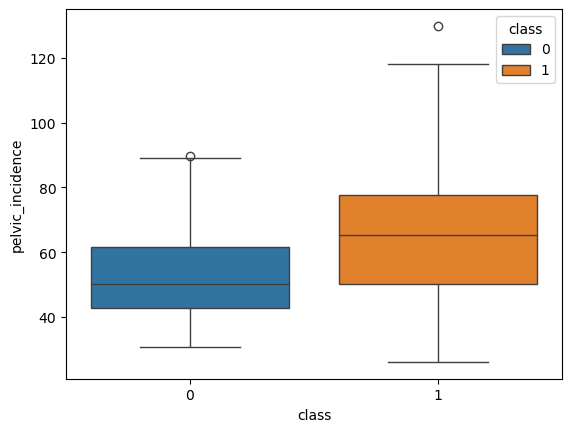

In [233]:
import seaborn as sns
sns.boxplot(x='class', y='pelvic_incidence', data=df, hue='class')

<Axes: xlabel='class', ylabel='pelvic_tilt'>

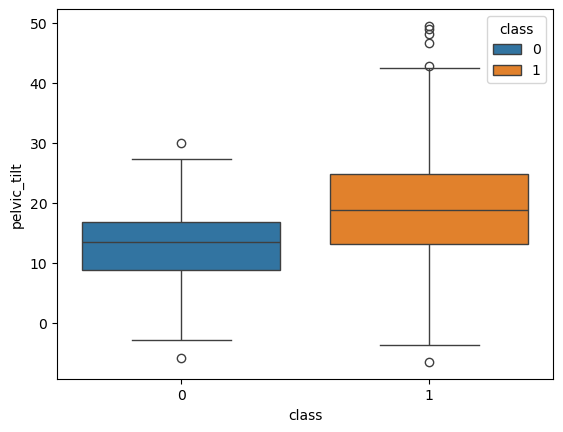

In [234]:
sns.boxplot(x='class', y='pelvic_tilt', data=df, hue='class')

<Axes: xlabel='class', ylabel='lumbar_lordosis_angle'>

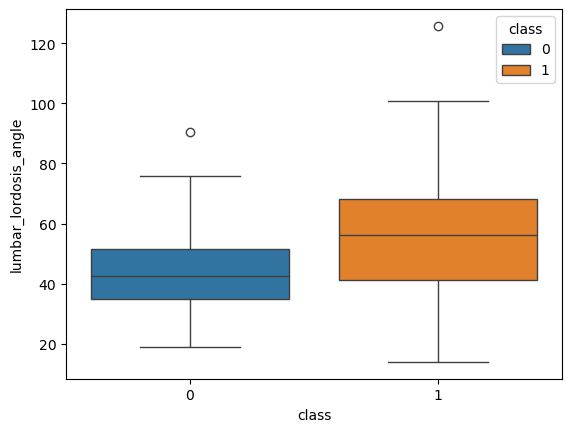

In [235]:
sns.boxplot(x='class', y='lumbar_lordosis_angle', data=df, hue='class')

<Axes: xlabel='class', ylabel='sacral_slope'>

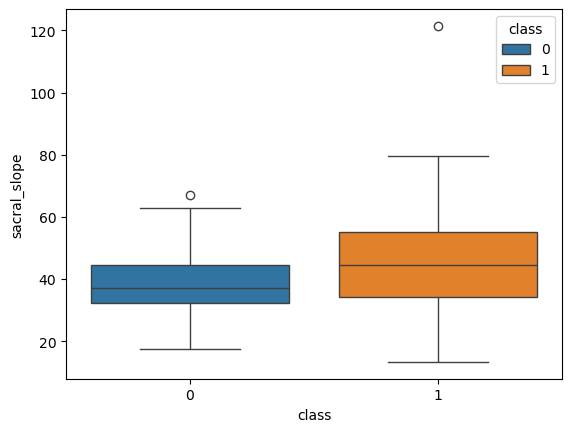

In [236]:
sns.boxplot(x='class', y='sacral_slope', data=df, hue='class')

<Axes: xlabel='class', ylabel='pelvic_radius'>

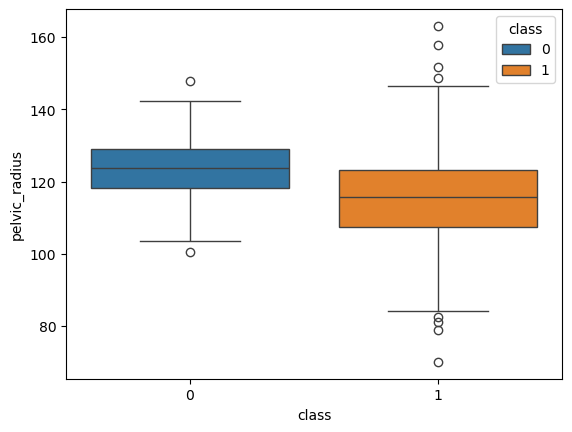

In [237]:
sns.boxplot(x='class', y='pelvic_radius', data=df, hue='class')

<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

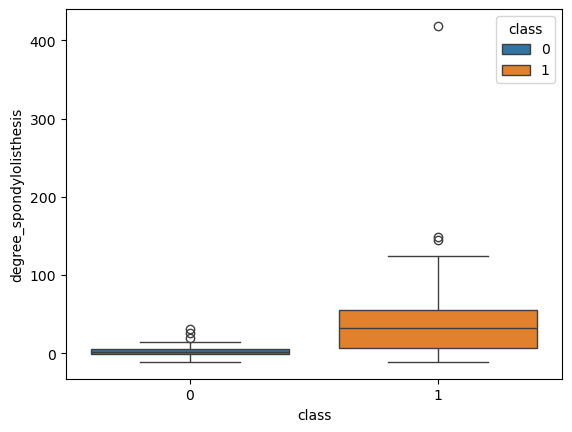

In [238]:
sns.boxplot(x='class', y='degree_spondylolisthesis', data=df, hue='class')

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [239]:
class_0 = df[df['class']==0]
class_1 = df[df['class']==1]
NOtrain1 = class_0.head(70)
ABtrain1 = class_1.head(140)
train1 = pd.concat([ABtrain1, NOtrain1])
test1 = df.drop(train1.index)

(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric.

In [240]:
x1_train = train1[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
x1_test = test1[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y1_train = train1['class']
y1_test = test1['class']

ii. Test all the data in the test database with k nearest neighbors.

In [241]:
from sklearn.neighbors import KNeighborsClassifier

k1 = 208
best_accu1 = 0
best_k1 = 0

while k1 > 0:
    knn = KNeighborsClassifier(n_neighbors=k1, p=2)
    knn.fit(x1_train, y1_train)
    accu1 = knn.score(x1_test, y1_test)
    if accu1 > best_accu1:
        best_accu1 = accu1
        best_k1 = k1
    k1 = k1-3

print('k1* =', best_k1)

k1* = 4


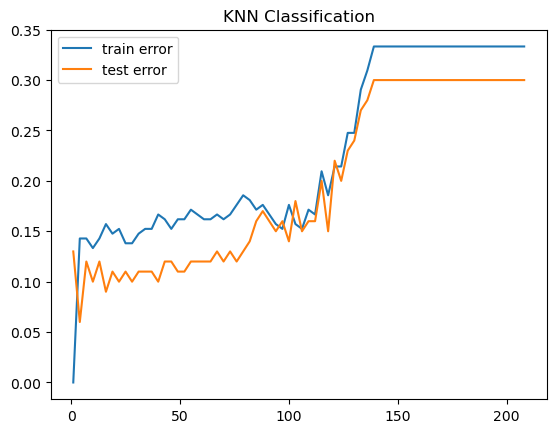

In [242]:
neighbors = np.arange(1, 209, 3)
train_errors = np.empty(len(neighbors))
test_errors = np.empty(len(neighbors))

for i, k1 in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k1, p=2)
    knn.fit(x1_train, y1_train)
    train_errors[i] = 1 - knn.score(x1_train, y1_train)
    test_errors[i] = 1 - knn.score(x1_test, y1_test)

plt.plot(neighbors, train_errors, label='train error')
plt.plot(neighbors, test_errors, label='test error')
plt.legend()
plt.title('KNN Classification')
plt.show()

In [243]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(x1_train, y1_train)
y1_predict = knn.predict(x1_test)
conf = confusion_matrix(y1_test, y1_predict)
print('confusion matrix:', conf)
true_positive_rate = conf[0, 0]/(conf[0, 0]+conf[0, 1])
true_negative_rate = conf[1, 1]/(conf[1, 0]+conf[1, 1])
print('true positive rate:', true_positive_rate)
print('true negative rate:', true_negative_rate)

from sklearn.metrics import classification_report
print('precision and F1-score:', classification_report(y1_test, y1_predict))

confusion matrix: [[25  5]
 [ 1 69]]
true positive rate: 0.8333333333333334
true negative rate: 0.9857142857142858
precision and F1-score:               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



iii. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈{10, 20, 30, . . . , 210}.

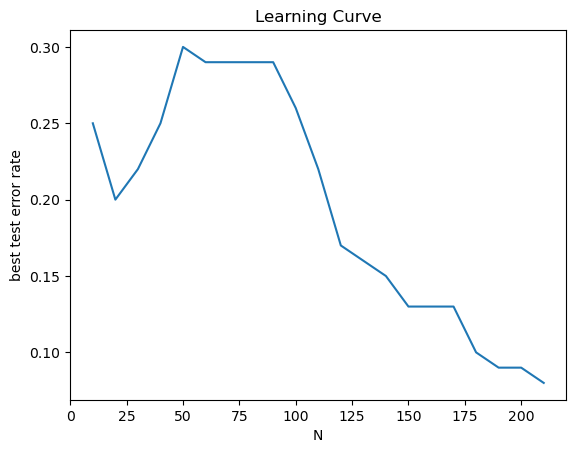

In [244]:
neighbors = np.arange(10, 211, 10)
best_test_error_rate = np.empty(len(neighbors))
i = 0
N = 10
while N <= 210:
    k2 = 1
    NOtrain2 = class_0.head(int(N/3))
    ABtrain2 = class_1.head(N-int(N/3))
    train2 = pd.concat([ABtrain2, NOtrain2])
    x2_train = train2[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    y2_train = train2['class']
    best_k2 = 0
    best_accu2 = 0
    while k2 <= N:
        knn = KNeighborsClassifier(n_neighbors=k2, p=2)
        knn.fit(x2_train, y2_train)
        accu2 = knn.score(x1_test, y1_test)
        if accu2 > best_accu2:
            best_accu2 = accu2
            best_k2 = k2
        k2 = k2+5
    best_test_error_rate[i] = 1 - best_accu2
    i = i+1    
    N = N+10
    
plt.plot(neighbors, best_test_error_rate)
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('best test error rate')
plt.show()

(d) Replace the Euclidean metric with the following metrics and test them.

i. Minkowski Distance

A. which becomes Manhattan Distance with p = 1.

In [245]:
k3 = 1
best_accuA = 0
best_kA_list = []

while k3 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k3, p=1)
    knn.fit(x1_train, y1_train)
    accuA = knn.score(x1_test, y1_test)
    if accuA > best_accuA:
        best_accuA = accuA
        best_kA_list = [k3]
    elif accuA == best_accuA:
        best_kA_list.append(k3)
    k3 = k3+5

print('kA* =', best_kA_list)

kA* = [1, 6, 11, 26]


In [246]:
#reference drom DeepSeek
from sklearn.model_selection import cross_val_score

k_values = [1, 6, 11, 26]
cv_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(knn, x1_train, y1_train, cv=5)
    cv_scores[k] = (scores.mean(), scores.std()) 

for k, (mean_score, std_score) in cv_scores.items():
    print(f"k = {k}: Mean_accu = {mean_score:.4f}, Stan_dev = {std_score:.4f}")

k = 1: Mean_accu = 0.7619, Stan_dev = 0.1543
k = 6: Mean_accu = 0.7571, Stan_dev = 0.1494
k = 11: Mean_accu = 0.7952, Stan_dev = 0.1061
k = 26: Mean_accu = 0.7190, Stan_dev = 0.1432


In [247]:
best_kA = 11 #Choose kA* = 11 because it has the highest mean accuracy and lowest standard deviation.

B. with log10(p) ∈{0.1, 0.2, 0.3, . . . , 1}.

In [248]:
best_accuB = 0
best_i = 0
i = 0.1

while i <= 1:
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=pow(10,i))
    knn.fit(x1_train, y1_train)
    y1_predict = knn.predict(x1_test)
    accuB = knn.score(x1_test, y1_test)
    if accuB > best_accuB:
        best_accuB = accuB
        best_i = i
    i = i+0.1

print('p* =', best_i)

p* = 0.6


C. which becomes Chebyshev Distance with p →∞.

In [249]:
k3 = 1
best_accuC = 0
best_kC_list = []

while k3 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k3, metric='chebyshev', p=float('inf'))
    knn.fit(x1_train, y1_train)
    y1_predict = knn.predict(x1_test)
    accuC = knn.score(x1_test, y1_test)
    if accuC > best_accuC:
        best_accuC = accuC
        best_kC_list = [k3]
    elif accuC == best_accuC:
        best_kC_list.append(k3)
    k3 = k3+5
    
print('kC* =', best_kC_list)

kC* = [16]


In [250]:
best_kC = 16 #Choose kC* = 16 because it has the highest accuracy.

ii. Mahalanobis Distance

In [251]:
k3 = 1
best_accuD = 0
best_kD_list = []

S = np.cov(x1_train.T)
SI = np.linalg.pinv(S)

while k3 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k3, metric='mahalanobis', metric_params={'VI': SI})
    knn.fit(x1_train, y1_train)
    y_pred = knn.predict(x1_test)
    accuD = sum(y_pred == y1_test) / len(y1_test)
    if accuD > best_accuD:
        best_accuD = accuD
        best_kD_list = [k3]
    elif accuD == best_accuD:
        best_kD_list.append(k3)
    k3 = k3+5

print('kD* =', best_kD_list)

kD* = [1]


In [252]:
best_kD = 1 #Choose kD* = 1 because it has the highest accuracy.

In [253]:
table = pd.DataFrame({'Distance':['Manhattan','Chebyshev','Mahalanobis'], 'k*': [best_kA, best_kC, best_kD], 'Test Errors': [1-best_accuA, 1-best_accuC, 1-best_accuD]})
print(table)

      Distance  k*  Test Errors
0    Manhattan  11         0.11
1    Chebyshev  16         0.08
2  Mahalanobis   1         0.15


(e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors.

In [254]:
k11 = 1
best_accu11 = 0
best_k11 = 1

while k11 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k11, p=2, weights='distance')
    knn.fit(x1_train, y1_train)
    accu11 = knn.score(x1_test, y1_test)
    if accu11 > best_accu11:
        best_accu11 = accu11
        best_k11 = k11
    k11 = k11+5

print('k11* =', best_k11)

k11* = 6


In [255]:
k33 = 1
best_accuAA = 0
best_kAA = 1

while k33 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k33, p=1, weights='distance')
    knn.fit(x1_train, y1_train)
    accuAA = knn.score(x1_test, y1_test)
    if accuAA > best_accuAA:
        best_accuAA = accuAA
        best_kAA = k33
    k33 = k33+5

print('kAA* =', best_kAA)

kAA* = 26


In [256]:
k33 = 1
best_accuCC = 0
best_kCC = 1

while k33 <= 196:
    knn = KNeighborsClassifier(n_neighbors=k33, metric='chebyshev', p=float('inf'), weights='distance')
    knn.fit(x1_train, y1_train)
    accuCC = knn.score(x1_test, y1_test)
    if accuCC > best_accuCC:
        best_accuCC = accuCC
        best_kCC = k33
    k33 = k33+5
    
print('kCC* =', best_kCC)

kCC* = 16


In [257]:
table1 = pd.DataFrame({'Distance':['Euclidean', 'Manhattan', 'Chebyshev'], 'k*': [best_k11, best_kAA, best_kCC], 'Test Errors': [1-best_accu11, 1-best_accuAA, 1-best_accuCC]})
print(table1)

    Distance  k*  Test Errors
0  Euclidean   6         0.10
1  Manhattan  26         0.10
2  Chebyshev  16         0.11


(f) What is the lowest training error rate you achieved in this homework?

Equals to 0.